In [22]:
# import lib
import numpy as np
from scipy import stats
from collections import Counter
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn import preprocessing
import sklearn.discriminant_analysis as da
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
import random
from datetime import datetime
%matplotlib inline

## Data Cleaning and Exploration

In [23]:
# first, we load the data 
# added two ,, in the end 
listings_df = pd.read_csv('listings.csv', header = 0)
calendar_df = pd.read_csv('calendar.csv', usecols=range(0,4), index_col=False)
reviews_df = pd.read_csv('reviews.csv', header = 0)

In [24]:
# visualize listings, our main data
listings_df.head()

,id,scrape_id,last_scraped,name,picture_url,host_id,host_name,host_since,host_picture_url,street,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count
0,1069266,20150101184336,2015-01-02,Stay like a real New Yorker!,https://a0.muscache.com/pictures/50276484/larg...,5867023,Michael,2013-04-10,https://a2.muscache.com/ic/users/5867023/profi...,"East 53rd Street, New York, NY 10022, United S...",...,2013-04-28,2014-12-17,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1
1,1846722,20150101184336,2015-01-02,Apartment 20 Minutes Times Square,https://a1.muscache.com/pictures/35865039/larg...,2631556,Denise,2012-06-13,https://a2.muscache.com/ic/users/2631556/profi...,"West 155th Street, New York, NY, United States",...,2014-01-05,2014-12-29,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2
2,2061725,20150101184336,2015-01-02,Option of 2 Beds w Private Bathroom,https://a2.muscache.com/pictures/50650147/larg...,4601412,Miao,2013-01-05,https://a0.muscache.com/ic/users/4601412/profi...,"Van Buren Street, Brooklyn, NY 11221, United S...",...,2014-02-04,2014-12-29,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4
3,44974,20150101184336,2015-01-03,Charming Bright West Village Studio,https://a1.muscache.com/pictures/20489905/larg...,198425,Sara,2010-08-11,https://a0.muscache.com/ic/users/198425/profil...,"Greenwich Ave, New York, NY 10011, United States",...,2010-10-08,2014-10-30,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1
4,4701675,20150101184336,2015-01-02,Charming Apartment in Chelsea,https://a2.muscache.com/pictures/60588955/larg...,22590025,Charles,2014-10-15,https://a2.muscache.com/ic/users/22590025/prof...,"West 22nd Street, New York, NY 10011, United S...",...,2014-12-08,2014-12-08,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1


In [5]:
# visualize calendar to check price seasonality
calendar_df.head()

,listing_id,date,available,price
0,3604481,2015-01-01,t,$600.00
1,3604481,2015-01-02,t,$600.00
2,3604481,2015-01-03,t,$600.00
3,3604481,2015-01-04,t,$600.00
4,3604481,2015-01-05,t,$600.00


In [6]:
# see reviews
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1180670,14705995,2014-06-24,10875598,Gregory,"Ok, if you like the location and don't mind an..."
1,4457617,24432844,2014-12-28,24502047,Amber,"Kleine süße WG, super gelegen, sehr freundlich..."
2,722394,9248781,2013-12-16,6821360,Giri,Extremely disappointed.
3,4074444,23983183,2014-12-15,8822691,Wendy,Exactly as described.
4,68046,11797670,2014-04-15,12231047,Virginie,"Appartement très sympa, accueillant. A quelque..."


shape: (27392, 52)


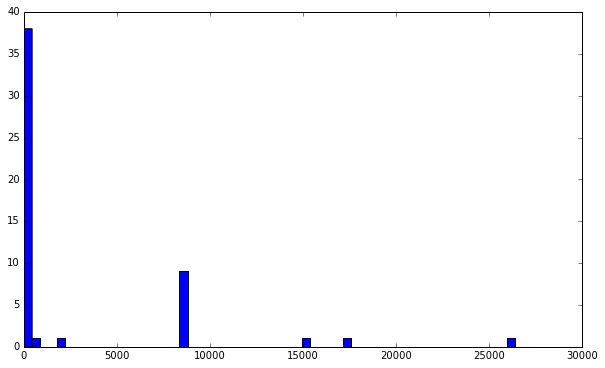

square_feet
weekly_price
monthly_price
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value


In [25]:
# see dimension
print 'shape:', listings_df.shape

# visualize how many values are missing from each predictor
missing_v = []
for i in listings_df.columns:
    missing_v.append((listings_df.shape[0] - listings_df[i].count()))
    
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist(missing_v, bins = 60)
plt.show()

# print all predictors missing more than 5000 values 
for i in listings_df.columns:
    if listings_df.shape[0] - listings_df[i].count() > 5000:
        print i
# delete predictors with too many missing values 
listings_modified1 = listings_df.drop(['square_feet','weekly_price','monthly_price', 'first_review', 'last_review'], axis = 1)

We acknowledge the importance of the content of reviews, but we think we can drop first_review and last_review because they are dates. However, we will keep all the review_scores because they seem important.

In [26]:
# we can predict the rest missing values
# delete country, state, market
print set(listings_df.country), set(listings_df.state), set(listings_df.market)
# same for all listings - delete these predictors
listings_modified2 = listings_modified1.drop(['country','state','market'], axis = 1)

set(['United States', nan]) set([nan, 'NY', 'ny', 'Queens NY 11377, USA', 'Ny']) set(['New York'])


In [27]:
# explore values of some predictors
print set(listings_modified2.scrape_id)
print set(listings_modified2.last_scraped)
print len(set(listings_modified2.neighbourhood)) # drop this
print len(set(listings_modified2.neighbourhood_cleansed)) 
print set(listings_modified2.is_location_exact)

# delete predictors that aren't informative for setting prices 
# delete predictors we don't want to include, such as pictures
listings_modified3 = listings_modified2.drop(['picture_url', 'host_id','host_picture_url', 
                                              'host_name', 'host_since','street', 'zipcode', 
                                              'calendar_updated', 'calendar_last_scraped',
                                              'neighbourhood', 'scrape_id', 'last_scraped'], axis = 1)

set([20150101184336])
set(['2015-01-26', '2015-01-03', '2015-01-02', '2015-01-01'])
191
186
set(['t', 'f'])


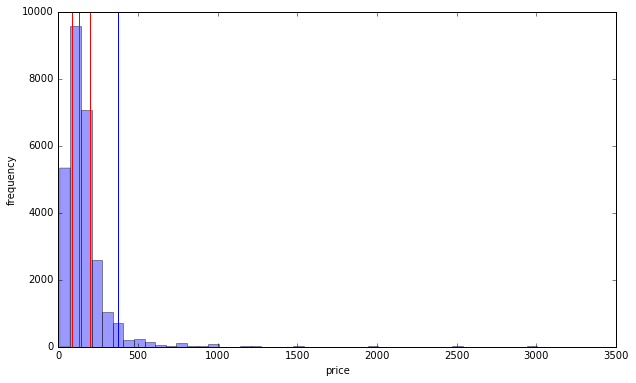

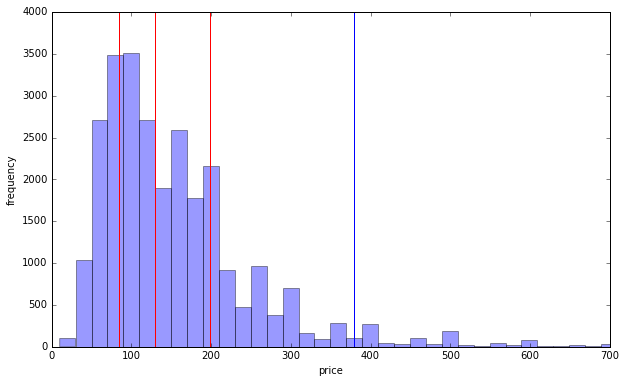

,id,name,neighbourhood_cleansed,city,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price,extra_people
0,1069266,Stay like a real New Yorker!,Midtown East,New York,40.756852,-73.964754,t,Apartment,Entire home/apt,2,...,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1,160.0,0.0
1,1846722,Apartment 20 Minutes Times Square,Hamilton Heights,New York,40.830599,-73.941014,f,Apartment,Entire home/apt,10,...,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2,105.0,50.0
2,2061725,Option of 2 Beds w Private Bathroom,Bushwick,Brooklyn,40.692189,-73.924120,t,Apartment,Private room,2,...,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4,58.0,12.0
3,44974,Charming Bright West Village Studio,West Village,New York,40.734751,-74.002592,t,Apartment,Entire home/apt,2,...,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1,185.0,0.0
4,4701675,Charming Apartment in Chelsea,Chelsea,New York,40.745282,-73.997836,t,Apartment,Entire home/apt,2,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,195.0,0.0


In [28]:
# clean up prices, delete dollar sign
prices_tmp = listings_modified3.price
extra_tmp = listings_modified3.extra_people

prices = []
extra = []
# delete all ,
for i in prices_tmp:
    prices.append(i.replace(',', ''))
    
for i in extra_tmp:
    extra.append(i.replace(',', ''))

prices = [float(i[1:]) for i in prices]
extra = [float(i[1:]) for i in extra]

price_1 = np.percentile(prices, 25)
price_2 = np.percentile(prices, 50)
price_3 = np.percentile(prices, 75)
price_high = np.percentile(prices, 95)

# visualize price distribution
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist(prices, alpha = 0.4, bins = 120)
ax.set_xlim(0,3500)
ax.set_ylabel('frequency')
ax.set_xlabel('price')
ax.axvline(x = price_1, color = 'r', linewidth=1)
ax.axvline(x = price_2,  color = 'r', linewidth=1)
ax.axvline(x = price_3,  color = 'r', linewidth=1)
ax.axvline(x = price_high, color = 'b', linewidth=1)
plt.show()

# we see a lot outliers

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist(prices, alpha = 0.4, bins = 400)
ax.set_xlim(0,700)
ax.set_ylabel('frequency')
ax.set_xlabel('price')
ax.axvline(x = price_1, color = 'r', linewidth=1)
ax.axvline(x = price_2,  color = 'r', linewidth=1)
ax.axvline(x = price_3,  color = 'r', linewidth=1)
ax.axvline(x = price_high, color = 'b', linewidth=1)
plt.show()


# # drop the old $ price and replace with float
listings_modified4 = listings_modified3.drop(['price', 'extra_people'], axis = 1)
listings_modified4['price'] = prices
listings_modified4['extra_people'] = extra
listings_modified4.head()

In [1]:
print 'The highest pirce that remains is', price_high

The highest pirce that remains is 379


In [53]:
listings_modified4 = listings_modified4[listings_modified4['price'] <= price_high]
len(listings_modified4)
listings_modified4

,id,name,neighbourhood_cleansed,city,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price,extra_people
0,1069266,Stay like a real New Yorker!,Midtown East,New York,40.756852,-73.964754,t,Apartment,Entire home/apt,2,...,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1,160.0,0.0
1,1846722,Apartment 20 Minutes Times Square,Hamilton Heights,New York,40.830599,-73.941014,f,Apartment,Entire home/apt,10,...,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2,105.0,50.0
2,2061725,Option of 2 Beds w Private Bathroom,Bushwick,Brooklyn,40.692189,-73.924120,t,Apartment,Private room,2,...,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4,58.0,12.0
3,44974,Charming Bright West Village Studio,West Village,New York,40.734751,-74.002592,t,Apartment,Entire home/apt,2,...,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1,185.0,0.0
4,4701675,Charming Apartment in Chelsea,Chelsea,New York,40.745282,-73.997836,t,Apartment,Entire home/apt,2,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,195.0,0.0
5,68914,Calm & Sunny Apt in Carroll Gardens,Carroll Gardens,Brooklyn,40.679060,-73.994730,t,Apartment,Entire home/apt,6,...,96.0,10.0,9.0,10.0,9.0,10.0,9.0,2,165.0,15.0
6,4832596,Large furnished sunny room,Bushwick,Brooklyn,40.684422,-73.909882,t,Apartment,Private room,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,80.0,0.0
7,2562510,2 br Private Room in LI/Chinatown,Chinatown,New York,40.719319,-73.997247,t,Apartment,Private room,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,120.0,0.0
8,3005360,Hip Luxury in the East Village 2BD,East Village,New York,40.726022,-73.986418,t,Apartment,Entire home/apt,4,...,96.0,10.0,9.0,9.0,10.0,10.0,9.0,4,150.0,20.0
9,2431607,Bright Airy Room for 2,Bedford-Stuyvesant,Brooklyn,40.686420,-73.934402,t,Apartment,Shared room,2,...,94.0,10.0,9.0,10.0,10.0,9.0,9.0,4,40.0,36.0


In [61]:
listings_modified4.index = range(0, len(listings_modified4))

In [62]:
listings_modified4

,id,name,neighbourhood_cleansed,city,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price,extra_people
0,1069266,Stay like a real New Yorker!,Midtown East,New York,40.756852,-73.964754,t,Apartment,Entire home/apt,2,...,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1,160.0,0.0
1,1846722,Apartment 20 Minutes Times Square,Hamilton Heights,New York,40.830599,-73.941014,f,Apartment,Entire home/apt,10,...,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2,105.0,50.0
2,2061725,Option of 2 Beds w Private Bathroom,Bushwick,Brooklyn,40.692189,-73.924120,t,Apartment,Private room,2,...,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4,58.0,12.0
3,44974,Charming Bright West Village Studio,West Village,New York,40.734751,-74.002592,t,Apartment,Entire home/apt,2,...,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1,185.0,0.0
4,4701675,Charming Apartment in Chelsea,Chelsea,New York,40.745282,-73.997836,t,Apartment,Entire home/apt,2,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,195.0,0.0
5,68914,Calm & Sunny Apt in Carroll Gardens,Carroll Gardens,Brooklyn,40.679060,-73.994730,t,Apartment,Entire home/apt,6,...,96.0,10.0,9.0,10.0,9.0,10.0,9.0,2,165.0,15.0
6,4832596,Large furnished sunny room,Bushwick,Brooklyn,40.684422,-73.909882,t,Apartment,Private room,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,80.0,0.0
7,2562510,2 br Private Room in LI/Chinatown,Chinatown,New York,40.719319,-73.997247,t,Apartment,Private room,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,120.0,0.0
8,3005360,Hip Luxury in the East Village 2BD,East Village,New York,40.726022,-73.986418,t,Apartment,Entire home/apt,4,...,96.0,10.0,9.0,9.0,10.0,10.0,9.0,4,150.0,20.0
9,2431607,Bright Airy Room for 2,Bedford-Stuyvesant,Brooklyn,40.686420,-73.934402,t,Apartment,Shared room,2,...,94.0,10.0,9.0,10.0,10.0,9.0,9.0,4,40.0,36.0


After getting rid of the expensive outliers, we have 1000 fewer listings than before. 

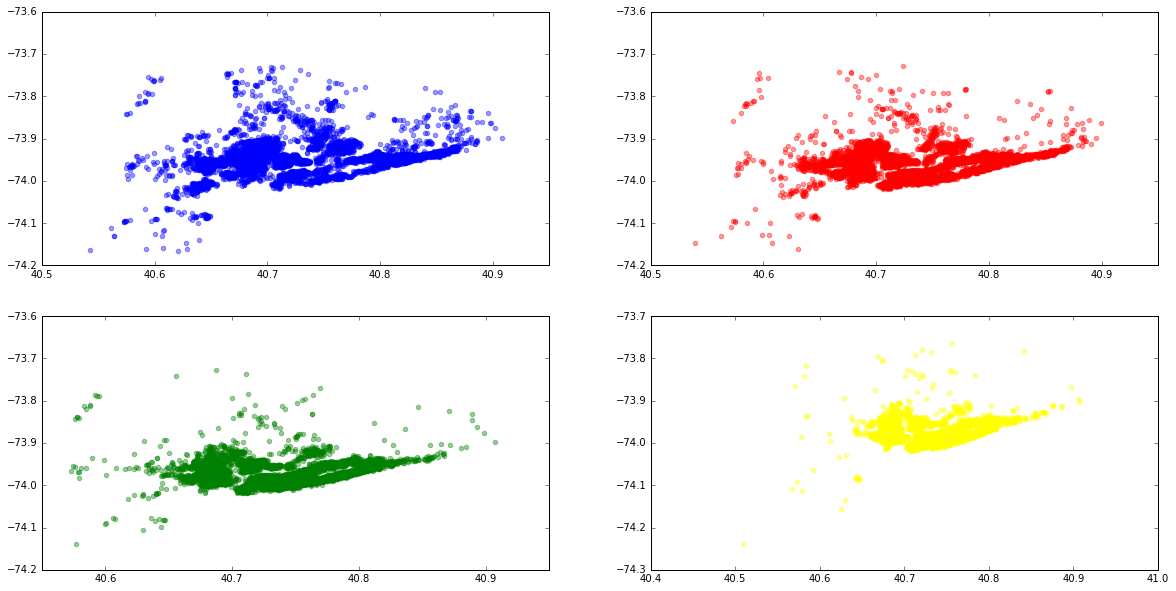

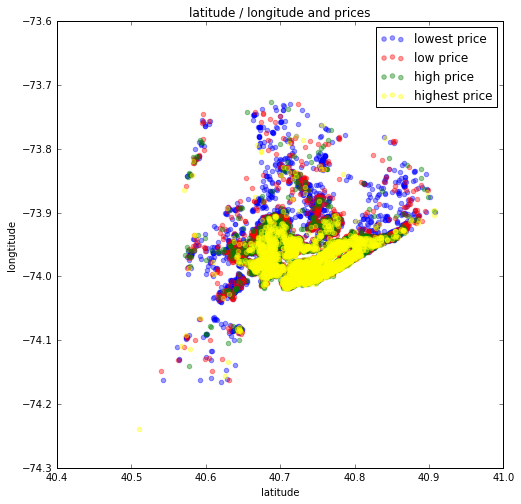

In [31]:
# create 4 classes based on price 
df_class1 = listings_modified4[listings_modified4['price'] <= price_1]
df_class2 = listings_modified4[(listings_modified4['price'] > price_1) & (listings_modified4['price'] <= price_2)]
df_class3 = listings_modified4[(listings_modified4['price'] > price_2) & (listings_modified4['price'] <= price_3)]
df_class4 = listings_modified4[listings_modified4['price'] > price_3]

# visualize latitude and longitude with different price classes
lat = listings_modified4.latitude
lon = listings_modified4.longitude


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))
ax1.scatter(df_class1.latitude, df_class1.longitude, color='b', label='lowest price', alpha=0.4)
ax2.scatter(df_class2.latitude, df_class2.longitude, color='r', label='low price', alpha=0.4)
ax3.scatter(df_class3.latitude, df_class3.longitude, color='g', label='high price', alpha=0.4)
ax4.scatter(df_class4.latitude, df_class4.longitude, color='yellow', label='highest price', alpha=0.4)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(df_class1.latitude, df_class1.longitude, color='b', label='lowest price', alpha=0.4)
ax.scatter(df_class2.latitude, df_class2.longitude, color='r', label='low price', alpha=0.4)
ax.scatter(df_class3.latitude, df_class3.longitude, color='g', label='high price', alpha=0.4)
ax.scatter(df_class4.latitude, df_class4.longitude, color='yellow', label='highest price', alpha=0.4)
ax.set_xlabel('latitude')
ax.set_ylabel('longtitude')
ax.set_title('latitude / longitude and prices')
ax.legend(loc='best')
plt.show()

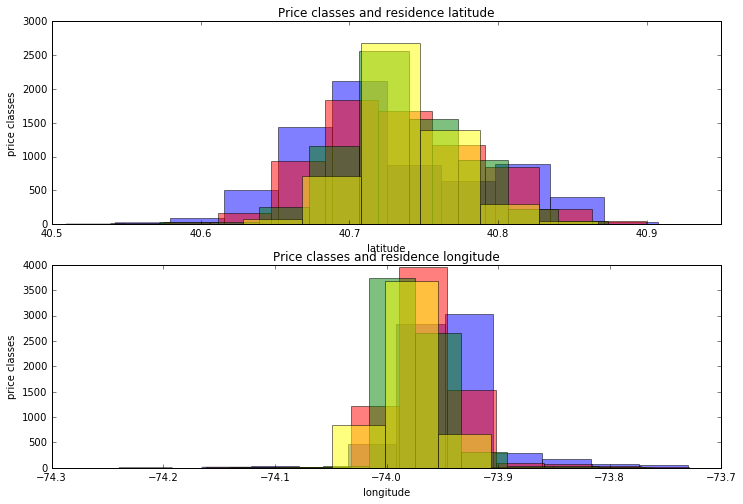

In [32]:
fig, (ax1, ax2) = plt.subplots(2 ,1 , figsize = (12, 8))
ax1.hist(df_class1.latitude, color='b', alpha = 0.5, label='lowest price')
ax1.hist(df_class2.latitude, color='r', alpha = 0.5, label='low price')
ax1.hist(df_class3.latitude, color='g', alpha = 0.5, label='high price')
ax1.hist(df_class4.latitude, color='yellow', alpha = 0.5, label='highest price')
ax1.set_xlabel('latitude')
ax1.set_ylabel('price classes')
ax1.set_title('Price classes and residence latitude')

ax2.hist(df_class1.longitude, color='b', alpha = 0.5, label='lowest price')
ax2.hist(df_class2.longitude, color='r', alpha = 0.5, label='low price')
ax2.hist(df_class3.longitude, color='g', alpha = 0.5, label='high price')
ax2.hist(df_class4.longitude, color='yellow', alpha = 0.5, label='highest price')
ax2.set_xlabel('longitude')
ax2.set_ylabel('price classes')
ax2.set_title('Price classes and residence longitude')

plt.show()

In [145]:
# standardize longitude and latitude
min_max_scaler = preprocessing.MinMaxScaler()
x_transformed = min_max_scaler.fit_transform(listings_modified4.latitude.values)
min_max_scaler = preprocessing.MinMaxScaler()
y_transformed = min_max_scaler.fit_transform(listings_modified4.longitude.values)

//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])


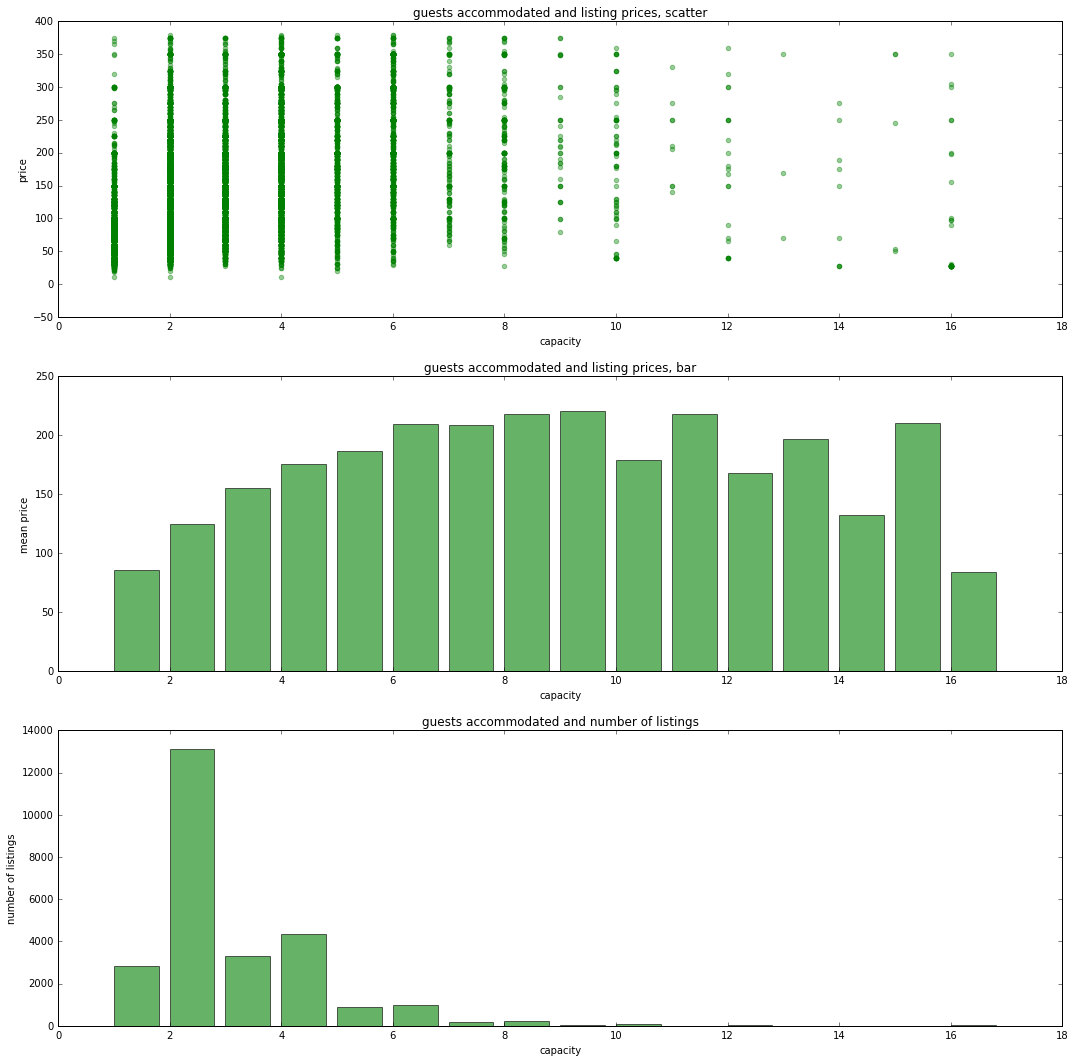

In [33]:
# visualize a few variables we hypothesize to have high predictive power for prices 
# accommodates don't have missing values
print set(listings_modified4.accommodates)

mean_price = []
nums = []
for i in set(listings_modified4.accommodates):
    mean = np.mean(listings_modified4[listings_modified4['accommodates'] == i].price)
    num = len(listings_modified4[listings_modified4['accommodates'] == i])
    mean_price.append(mean)  
    nums.append(num)
    
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(18, 18))
ax1.scatter(listings_modified4.accommodates, listings_modified4.price, color='g', alpha = 0.4)
ax1.set_title('guests accommodated and listing prices, scatter')
ax1.set_xlabel('capacity')
ax1.set_ylabel('price')
ax2.bar(list(set(listings_modified4.accommodates)), mean_price, color='g', alpha = 0.6)
ax2.set_title('guests accommodated and listing prices, bar')
ax2.set_xlabel('capacity')
ax2.set_ylabel('mean price')
ax3.bar(list(set(listings_modified4.accommodates)), nums, color='g', alpha = 0.6)
ax3.set_title('guests accommodated and number of listings')
ax3.set_xlabel('capacity')
ax3.set_ylabel('number of listings')
plt.show()

1.0     20019
2.0      2965
0.0      2292
3.0       518
4.0        73
5.0        12
6.0         2
10.0        1
9.0         1
8.0         1
7.0         1
Name: bedrooms, dtype: int64


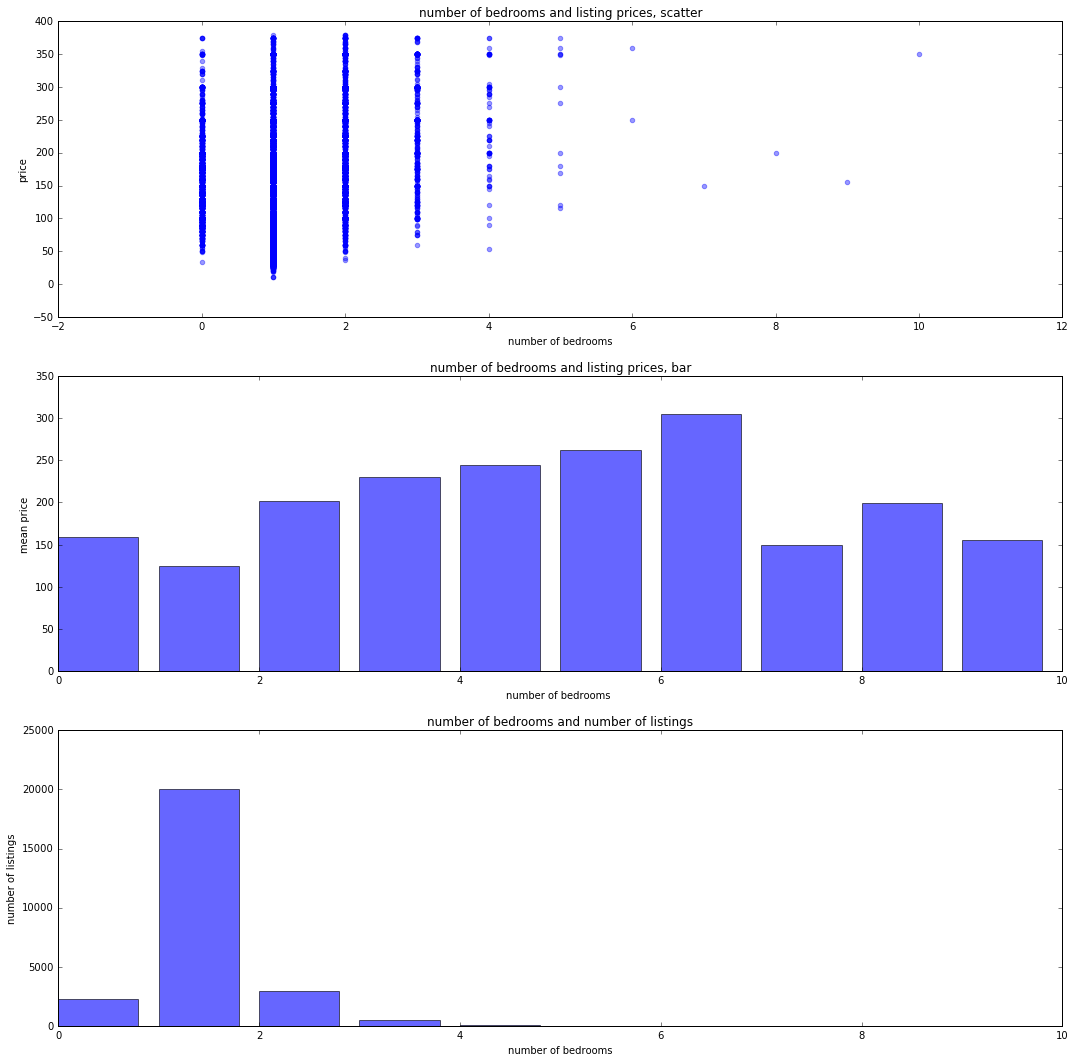

In [34]:
print listings_modified4['bedrooms'].value_counts()
frequency = []

mean_price_2 = []
nums_2 = []
for i in range(0,10):
    mean = np.mean(listings_modified4[listings_modified4['bedrooms'] == i].price)
    num = len(listings_modified4[listings_modified4['bedrooms'] == i])
    mean_price_2.append(mean)  
    nums_2.append(num)
    
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(18, 18))
ax1.scatter(listings_modified4.bedrooms, listings_modified4.price, color='b', alpha = 0.4)
ax1.set_title('number of bedrooms and listing prices, scatter')
ax1.set_xlabel('number of bedrooms')
ax1.set_ylabel('price')
ax2.bar(range(0,10), mean_price_2, color='b',alpha = 0.6)
ax2.set_title('number of bedrooms and listing prices, bar')
ax2.set_xlabel('number of bedrooms ')
ax2.set_ylabel('mean price')
ax3.bar(range(0,10), nums_2, color='b',alpha = 0.6)
ax3.set_title('number of bedrooms and number of listings')
ax3.set_xlabel('number of bedrooms')
ax3.set_ylabel('number of listings')
plt.show()

In [63]:
# fill missing values by sampling observed values
def fill_by_sampling(df_input):
    df = df_input.copy()
    for col in df.columns:
        for i in range(len(df[col])):
            if pd.isnull(df[col].values[i]):
                df.set_value(i, col, random.choice(df[col].dropna().values))
    return df

# fill in values
df_filled_random = fill_by_sampling(listings_modified4)
df_filled_random.shape

(26024, 32)

We've done some data cleaning for milestone 3. 

In [36]:
# very messy data in "city"
set(df_filled_random.city)

{nan,
 ' Astoria',
 ' Astoria ',
 ' Bushwick,Brooklyn',
 ' Woodside ',
 'ASTORIA',
 'ASTORIA ',
 'Arverne',
 'Astoria',
 'Astoria ',
 'Astoria (Queens)',
 'Astoria queens',
 'Astoria, NYC',
 'Astoria, New York ',
 'Astoria, Queens',
 'Astoria, Queens ',
 'Astoria, Queens, NY, USA',
 'Astoria,New York ',
 'Auburndale',
 'BRONX',
 'BRONX ',
 'BROOKLYN',
 'Bayside',
 'Belle Harbor',
 'Bklyn. ',
 'Briarwood',
 'Briarwood  Queens, NYC',
 'Brighton Beach',
 'Bronx',
 'Bronx ',
 'Bronx, NY',
 'Bronx, Riverdale ',
 'Brookly,',
 'Brooklyn',
 'Brooklyn\nBrooklyn sheepshead bay',
 'Brooklyn\nan/ll/lol/',
 'Brooklyn ',
 'Brooklyn Kensington area',
 'Brooklyn,  Ny 11221',
 'Brooklyn, Bedford Stuyvesant',
 'Brooklyn, New York',
 'Brooklyn. ',
 'Bushwick',
 'Bushwick, Brooklyn',
 'Bx',
 'Chelsea',
 'Chelsea, New York',
 'Clinton Hill, Brooklyn',
 'College Point',
 'Corona',
 'Corona ',
 'Cypress Hills, Brooklyn',
 'Downtown Brooklyn ',
 'EAST ELMHURST',
 'East Elmhurst',
 'East Williamsburg',
 'Elmhu

In [64]:
# drop "city", "latitude","longitude" because they're correlated with neighborhood
df_filled_random2 = df_filled_random.drop(['city','latitude','longitude','name'], axis = 1)

In [65]:
# print columns
print df_filled_random2.columns
print len(df_filled_random2.columns)
df_filled_random2

Index([u'id', u'neighbourhood_cleansed', u'is_location_exact',
       u'property_type', u'room_type', u'accommodates', u'bathrooms',
       u'bedrooms', u'beds', u'bed_type', u'guests_included',
       u'minimum_nights', u'maximum_nights', u'availability_30',
       u'availability_60', u'availability_90', u'availability_365',
       u'number_of_reviews', u'review_scores_rating',
       u'review_scores_accuracy', u'review_scores_cleanliness',
       u'review_scores_checkin', u'review_scores_communication',
       u'review_scores_location', u'review_scores_value',
       u'host_listing_count', u'price', u'extra_people'],
      dtype='object')
28


,id,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price,extra_people
0,1069266,Midtown East,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,...,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1,160.0,0.0
1,1846722,Hamilton Heights,f,Apartment,Entire home/apt,10,1.0,3.0,3.0,Real Bed,...,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2,105.0,50.0
2,2061725,Bushwick,t,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,...,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4,58.0,12.0
3,44974,West Village,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,...,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1,185.0,0.0
4,4701675,Chelsea,t,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,195.0,0.0
5,68914,Carroll Gardens,t,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,...,96.0,10.0,9.0,10.0,9.0,10.0,9.0,2,165.0,15.0
6,4832596,Bushwick,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,...,90.0,10.0,9.0,10.0,10.0,10.0,10.0,1,80.0,0.0
7,2562510,Chinatown,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,...,100.0,9.0,10.0,10.0,10.0,10.0,9.0,1,120.0,0.0
8,3005360,East Village,t,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,...,96.0,10.0,9.0,9.0,10.0,10.0,9.0,4,150.0,20.0
9,2431607,Bedford-Stuyvesant,t,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,...,94.0,10.0,9.0,10.0,10.0,9.0,9.0,4,40.0,36.0


In [109]:
# deal with categorical variables
df_expanded = pd.get_dummies(df_filled_random2)
print df_expanded.shape
df_expanded.head()

(26024, 236)


,id,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,...,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,1069266,2,1.0,1.0,1.0,2,3,14,21,51,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1846722,10,1.0,3.0,3.0,1,1,180,28,58,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2061725,2,1.0,1.0,2.0,1,3,30,4,13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,44974,2,1.0,1.0,1.0,1,10,30,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4701675,2,1.0,1.0,2.0,1,1,1125,30,60,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Not a surprise that we have 236 predictors - neighborhood_cleansed (originally with over 180 values) is now turned into a categorical variable. 

In [159]:
# isolate x and y
y_df = df_expanded['price']
# drop id, that shouldn't be a predictor
x_df = df_expanded.drop(['price','id'], axis = 1)

X = x_df.values
y = y_df.values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
x_df

,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,2,1.0,1.0,1.0,2,3,14,21,51,72,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10,1.0,3.0,3.0,1,1,180,28,58,88,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.0,1.0,2.0,1,3,30,4,13,26,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,1.0,1.0,1.0,1,10,30,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,1.0,1.0,2.0,1,1,1125,30,60,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6,1.0,2.0,3.0,2,2,365,11,33,57,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,2,1.0,1.0,1.0,1,1,1125,29,59,89,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,2,1.0,1.0,1.0,1,2,1125,5,5,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,4,1.0,2.0,2.0,2,1,1125,30,60,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,2,1.0,1.0,1.0,1,4,30,0,30,60,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [161]:
# run baseline model: OLS
ols = LinReg()
ols.fit(x_train, y_train)
y_pred = ols.predict(x_test)
ols.score(x_test, y_test)

0.61103386608981469

In [99]:
# try ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
ridge.score(x_test, y_test)

0.60917162874345332

**Regularization:** We will perform Ridge regression to prevent overfitting. The optimal parameter $\lambda$ for Ridge will  be determined through 5-fold cross-validation using CV MSE. We'll use `RidgeCV` from `sklearn` rather than `Ridge`, as `RidgeCV` automatically performs parameter tuning (for the regularization parameter $\lambda$) using k-fold x-validation.

In [71]:
#Function for calculating BIC
BIC = lambda n, d, RSS: n * np.log(RSS * 1. / n) + d * np.log(n)
#Function for calculating Residual Sum of Squares
RSS = lambda predict, actual: np.sum((predict - actual)**2)

#Function for finding the best model 
def best_poly_model(pred, response, max_deg, reg_params):
    #Best regularization parameter for each degree
    lambdas = []
    #Best BIC for each degree
    bics = []
    #Best model parameters for each degree
    params = []
    
    #Iterate through degrees 1 to max_degree
    for degree in range(1, max_deg):
        #Turn one predictor into 1, t, t^2, t^3, ...
        poly_t = PolynomialFeatures(degree=degree)
        pred_expanded = poly_t.fit_transform(pred)
        
        #Perform Ridge regression using expanded set of predictors, 
        #choose best regularization parameter lambda using 5-fold x-validation
        ridge = RidgeCV(alphas=reg_params, fit_intercept=False, normalize=True, cv=5)
        ridge.fit(pred_expanded, response)
        
        #Record the parameters of the model chosen by 5-fold x-validation
        params.append(ridge.coef_)
        #Record the lambda chosen by 5-fold x-validation
        lambdas.append(ridge.alpha_)
        
        #Record the BIC score of the model chosen by 5-fold x-validation
        response_hat = ridge.predict(pred_expanded)        
        error = RSS(response_hat, response)
        bics.append(BIC(pred.shape[0], degree, error))
    
    #Find the degree with the min BIC score
    best_degree = np.argmin(bics) + 1
    #Find the best lambda for the degree with the min BIC score
    best_lambda = lambdas[best_degree - 1]
    #Find the best model parameters for the degree with the min BIC score
    best_params = params[best_degree - 1]
    
    return best_degree, best_lambda, best_params       

In [72]:
#Set maximum polynomial degree
max_degree = 3
#List of regularization parameters to try
lambdas = 10.**np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])

In [73]:
best_degree, best_lambda, best_params  = best_poly_model(X, y, max_degree, lambdas)    
    
print 'best polynomial model has degree:', best_degree
print 'best regularization parameter for this degree:', best_lambda
print 'best intercept for this degree (ridge regression):', best_params[0]
print 'best coefficients for this degree (ridge regression):', best_params[1:]

best polynomial model has degree: 1
best regularization parameter for this degree: 1.0
best intercept for this degree (ridge regression): -21.8160846458
best coefficients for this degree (ridge regression): [  6.68075458e+00   1.39241733e+01   2.37573011e+01  -3.69258745e+00
   4.88405357e+00  -1.29209106e+00  -1.90243862e-08   1.21047577e-01
  -4.42257147e-02   7.82440880e-02   4.30135145e-02  -3.68298026e-01
   2.67570440e-01   1.24103690e+00   1.95979006e+00   9.40439099e-01
   4.62777270e-01   9.30935978e-01  -1.19581653e+00  -1.30570267e+00
  -2.84473632e-02  -1.16933834e+01   3.87078242e+01  -4.45836904e+00
  -1.20504245e+01   5.91718216e+01  -2.53511396e+01  -1.40553048e+01
  -4.03238363e+01   1.17641568e+01  -2.90757972e+01  -1.88334359e+01
  -4.80223845e+00  -4.18148828e+01   3.06883959e+01  -1.01080432e+01
  -3.49409842e+01  -5.39894418e+01  -6.60949991e+00   3.42895777e+01
   4.11782209e+00  -1.20834445e+01  -4.42483081e+01   3.01074107e+01
  -1.44907840e+01  -3.12521589e+00

In [74]:
# see the accuracy for tuned ridge 
tuned_ridge = Ridge(alpha = 100)
tuned_ridge.fit(x_train, y_train)
tuned_ridge.score(x_test, y_test)

0.59539622364047939

Tuned ridge has R^2 of , regularization is pretty strong, but the improvement in accuracy is really small. 

In [164]:
lasso = Lasso()
lasso.fit(x_train, y_train)
lasso.score(x_test, y_test)

0.46345835010726566

In [165]:
# see what variables lasso selects with tuning param lambda 
# Lasso regression
coefficients = lasso.coef_
print 'Lasso:'
print  'Predictors with non-zero coefficients:', [i for i, item in enumerate(coefficients) if abs(item) > 0]

Lasso:
Predictors with non-zero coefficients: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 17, 18, 19, 20, 31, 41, 46, 103, 189, 196, 226]


Lasso selected a relatively small subset of the predictors. Now that we've built our baseline models for listings.csv. We next direct our attention to calendar.csv to investigate the effect of holidays on price. 

In [166]:
# print selected column names
print  'Predictors with non-zero coefficients:', [x_df.columns[i] for i, item in enumerate(coefficients) if abs(item) > 0]

Predictors with non-zero coefficients: ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_location', 'review_scores_value', 'host_listing_count', 'extra_people', 'neighbourhood_cleansed_Bedford-Stuyvesant', 'neighbourhood_cleansed_Bushwick', 'neighbourhood_cleansed_Chelsea', "neighbourhood_cleansed_Hell's Kitchen", 'neighbourhood_cleansed_Upper West Side', 'neighbourhood_cleansed_West Village', 'room_type_Entire home/apt']


The set of variables chosen by lasso makes sense. We notice that being in some specific neighborhoods do make a difference - but there are so many of them and most got dropped by lasso

In [167]:
#Function for finding the best model 
def best_lasso_model(pred, response, max_deg, reg_params):
    #Best regularization parameter for each degree
    lambdas = []
    #Best BIC for each degree
    bics = []
    #Best model parameters for each degree
    params = []
    
    #Iterate through degrees 1 to max_degree
    for degree in range(1, max_deg):
        #Turn one predictor into 1, t, t^2, t^3, ...
        poly_t = PolynomialFeatures(degree=degree)
        pred_expanded = poly_t.fit_transform(pred)
        
        #Perform Ridge regression using expanded set of predictors, 
        #choose best regularization parameter lambda using 5-fold x-validation
        lasso = LassoCV(alphas=reg_params, fit_intercept=False, normalize=True, cv=5)
        lasso.fit(pred_expanded, response)
        
        #Record the parameters of the model chosen by 5-fold x-validation
        params.append(lasso.coef_)
        #Record the lambda chosen by 5-fold x-validation
        lambdas.append(lasso.alpha_)
        
        #Record the BIC score of the model chosen by 5-fold x-validation
        response_hat = lasso.predict(pred_expanded)        
        error = RSS(response_hat, response)
        bics.append(BIC(pred.shape[0], degree, error))
    
    #Find the degree with the min BIC score
    best_degree = np.argmin(bics) + 1
    #Find the best lambda for the degree with the min BIC score
    best_lambda = lambdas[best_degree - 1]
    #Find the best model parameters for the degree with the min BIC score
    best_params = params[best_degree - 1]
    
    return best_degree, best_lambda, best_params  

In [169]:
best_degree_lasso, best_lambda_lasso, best_params_lasso  = best_lasso_model(X, y, 2, lambdas)    
print 'best polynomial model has degree:', best_degree_lasso
print 'best regularization parameter for this degree:', best_lambda_lasso
# print 'best intercept for this degree (lasso regression):', best_params_lasso[0]
# print 'best coefficients for this degree (lasso regression):', best_params_lasso[1:]

best polynomial model has degree: 1
best regularization parameter for this degree: 0.001


In [168]:
tuned_lasso = Lasso(alpha = 0.1)
tuned_lasso.fit(x_train, y_train)
tuned_lasso.score(x_test, y_test)

0.58507201683221344

In [170]:
# PCA 
pca = PCA(n_components = 3)
pca.fit(x_train)
print pca.explained_variance_ratio_
print(pca.components_)

[  1.00000000e+00   5.63119433e-11   2.33313751e-12]
[[  2.85827301e-10  -5.07761611e-11   3.10265959e-10   6.27032644e-10
    2.97756443e-10  -1.52474804e-10   1.00000000e+00   7.01180315e-09
    1.35985920e-08   1.98052512e-08   5.75310522e-08   6.43520998e-10
   -4.05543687e-09  -3.81182843e-10  -7.73289041e-10  -1.44522170e-10
    1.16267103e-11  -4.81034264e-10  -7.55677617e-11   8.56406950e-10
    1.31798379e-09  -1.85573910e-13  -1.53285638e-11  -1.38423632e-11
   -3.08197694e-14  -2.31792714e-12  -2.16366824e-12   0.00000000e+00
   -4.94946036e-13  -2.77903657e-13  -1.23672220e-13  -2.55550389e-11
   -3.08333141e-13  -3.09935280e-14  -3.80174178e-12  -3.10165175e-14
   -4.32387806e-13  -3.10024381e-14  -2.16640149e-13  -3.36914297e-12
   -1.08195700e-12  -2.39692349e-11  -7.72705871e-13  -3.52275528e-12
   -3.08197705e-14  -3.08197697e-14  -1.76746738e-11  -5.90281506e-12
   -9.26437609e-14  -7.09890488e-13  -2.16210654e-13  -3.10149137e-14
   -1.11557615e-11  -9.57971841e-13  

In [171]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5)*100)

array([ 100.,  100.,  100.])

In [175]:
# linear regression using first component 
ols = LinReg()
ols.fit(x_train*pca.components_[0], y_train)
ols.score(x_test*pca.components_[0], y_test)

0.014955883691927019

In [176]:
# linear regression using first three components 
ols = LinReg()
x_train_transformed = pca.transform(x_train)
x_test_transformed = pca.transform(x_test)
ols.fit(x_train_transformed, y_train)
ols.score(x_test_transformed, y_test)

0.00087747977399144084

In [177]:
lasso = Lasso()
lasso.fit(x_train_transformed, y_train)
lasso.score(x_test_transformed, y_test)

0.00086983916371596848

In [163]:
# we split them up into 6 intervals, so intervals are small but still allow us to retain accuracy
price_1 = np.percentile(df_expanded.price, 20)
price_2 = np.percentile(df_expanded.price, 40)
price_3 = np.percentile(df_expanded.price, 60)
price_4 = np.percentile(df_expanded.price, 80)

print price_1, price_2, price_3, price_4

# convert ols accuracy into accuracy rate 
y_pred = ols.predict(x_test)

def y_to_classes(y_list):
    classes = []
    for y in y_list:
        if y <= price_1:
            classes.append(1)
        if y > price_1 and y <= price_2:
            classes.append(2)
        if y > price_2 and y <= price_3:
            classes.append(3)
        if y > price_3 and y <= price_4:
            classes.append(4)
        if y > price_4:
            classes.append(5)
    return classes

class_pred = y_to_classes(y_pred)
class_test = y_to_classes(y_test) 

print class_pred[:10]
print class_test[:10]

counter = 0
for i in range(len(class_pred)):
    if class_pred[i] == class_test[i]:
        counter = counter + 1
    else:
        counter = counter
print float(counter)/float(len(class_pred))

75.0 100.0 150.0 200.0
[5, 3, 4, 2, 5, 4, 1, 3, 5, 2]
[5, 1, 4, 1, 4, 5, 1, 1, 3, 2]
0.476178278689


## Classification
1: find the price ranges
2: make a new df with new prices classes
3: try different kinds of classification methods

            id  accommodates  bathrooms  bedrooms  beds  guests_included  \
2      2061725             2        1.0       1.0   2.0                1   
9      2431607             2        1.0       1.0   1.0                1   
18     4060165             1        1.0       1.0   1.0                1   
47     2568017             2        1.0       1.0   1.0                1   
50     4468759             1        0.5       1.0   1.0                1   
61      843499             2        1.0       1.0   1.0                1   
62      111308             2        1.0       1.0   1.0                1   
64     2842403             2        1.0       1.0   1.0                0   
79     3883866             1        1.0       1.0   2.0                1   
80     1018769             2        1.0       1.0   1.0                2   
96       54486             1        2.0       1.0   1.0                1   
108    4808316             2        1.0       1.0   1.0                1   
124    48684

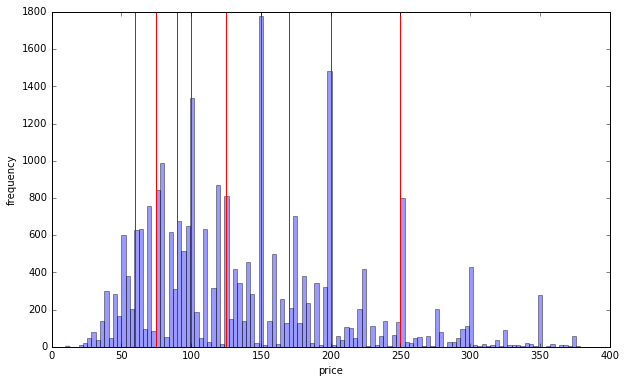

In [117]:
# we split them up into 10 intervals, so intervals are small but still allow us to retain accuracy
price_1 = np.percentile(df_expanded.price, 10)
price_2 = np.percentile(df_expanded.price, 20)
price_3 = np.percentile(df_expanded.price, 30)
price_4 = np.percentile(df_expanded.price, 40)
price_5 = np.percentile(df_expanded.price, 50)
price_6 = np.percentile(df_expanded.price, 60)
price_7 = np.percentile(df_expanded.price, 70)
price_8 = np.percentile(df_expanded.price, 80)
price_9 = np.percentile(df_expanded.price, 90)

# 10 dfs
df_class1 = df_expanded[df_expanded['price'] <= price_1]
print df_class1
df_class2 = df_expanded[(df_expanded['price'] > price_1) & (df_expanded['price'] <= price_2)]
df_class3 = df_expanded[(df_expanded['price'] > price_2) & (df_expanded['price'] <= price_3)]
df_class4 = df_expanded[(df_expanded['price'] > price_3) & (df_expanded['price'] <= price_4)]
df_class5 = df_expanded[(df_expanded['price'] > price_4) & (df_expanded['price'] <= price_5)]
df_class6 = df_expanded[(df_expanded['price'] > price_5) & (df_expanded['price'] <= price_6)]
df_class7 = df_expanded[(df_expanded['price'] > price_6) & (df_expanded['price'] <= price_7)]
df_class8 = df_expanded[(df_expanded['price'] > price_7) & (df_expanded['price'] <= price_8)]
df_class9 = df_expanded[(df_expanded['price'] > price_8) & (df_expanded['price'] <= price_9)]
df_class10 = df_expanded[(df_expanded['price'] > price_9)]

# visualize price distribution
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist(df_expanded.price, alpha = 0.4, bins = 120)
ax.set_xlim(0,400)
ax.set_ylabel('frequency')
ax.set_xlabel('price')
ax.axvline(x = price_1, color = 'r', linewidth=1)
ax.axvline(x = price_2,  color = 'r', linewidth=1)
ax.axvline(x = price_3,  color = 'r', linewidth=1)
ax.axvline(x = price_4, color = 'r', linewidth=1)
ax.axvline(x = price_5,  color = 'r', linewidth=1)
ax.axvline(x = price_6,  color = 'r', linewidth=1)
ax.axvline(x = price_7, color = 'r', linewidth=1)
ax.axvline(x = price_8,  color = 'r', linewidth=1)
ax.axvline(x = price_9,  color = 'r', linewidth=1)
plt.show()

In [116]:
df_expanded.head()

,id,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,...,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,1069266,2,1.0,1.0,1.0,2,3,14,21,51,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1846722,10,1.0,3.0,3.0,1,1,180,28,58,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2061725,2,1.0,1.0,2.0,1,3,30,4,13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,44974,2,1.0,1.0,1.0,1,10,30,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4701675,2,1.0,1.0,2.0,1,1,1125,30,60,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [119]:
# make a new DF with new classes
df_new = df_expanded.copy()
df_new['price_tag'] = np.zeros(len(df_expanded.price))

# function to set dummy varibles for price tags
def set_price_dummy(df, num):
    for i in df['id'].values:
        df_new.set_value(df_new.loc[df_new['id'] == i].index, 'price_tag', num)
# set
set_price_dummy(df_class1, 1)
set_price_dummy(df_class2, 2)
set_price_dummy(df_class3, 3)
set_price_dummy(df_class4, 4)
set_price_dummy(df_class5, 5)
set_price_dummy(df_class6, 6)
set_price_dummy(df_class7, 7)
set_price_dummy(df_class8, 8)
set_price_dummy(df_class9, 9)
set_price_dummy(df_class10, 10)

In [120]:
df_new.head(n=10)

,id,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,...,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,price_tag
0,1069266,2,1.0,1.0,1.0,2,3,14,21,51,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
1,1846722,10,1.0,3.0,3.0,1,1,180,28,58,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
2,2061725,2,1.0,1.0,2.0,1,3,30,4,13,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,44974,2,1.0,1.0,1.0,1,10,30,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
4,4701675,2,1.0,1.0,2.0,1,1,1125,30,60,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
5,68914,6,1.0,2.0,3.0,2,2,365,11,33,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
6,4832596,2,1.0,1.0,1.0,1,1,1125,29,59,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
7,2562510,2,1.0,1.0,1.0,1,2,1125,5,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
8,3005360,4,1.0,2.0,2.0,2,1,1125,30,60,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
9,2431607,2,1.0,1.0,1.0,1,4,30,0,30,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [146]:
# drop and save price
dropped_price = df_new.price
df_new1 = df_new.drop('price', axis=1)
y_df = df_new1['price_tag']
x_df = df_new1.drop(['price_tag','id'], axis=1)
x_df['x_transformed'] = x_transformed
x_df['y_transformed'] = y_transformed

# turn the set into train and test
# get X and Y
X = x_df.values
y = y_df.values

# test and train split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [86]:
# now we take a look at which model in general performs better in this model

# get our models
score = lambda model, x_test, y_test: pd.Series([model.score(x_test, y_test), 
                                                 model.score(x_test[y_test==1], y_test[y_test==1]),
                                                 model.score(x_test[y_test==2], y_test[y_test==2]),
                                                 model.score(x_test[y_test==3], y_test[y_test==3]),
                                                 model.score(x_test[y_test==4], y_test[y_test==4]),
                                                 model.score(x_test[y_test==5], y_test[y_test==5]),
                                                 model.score(x_test[y_test==6], y_test[y_test==6]),
                                                 model.score(x_test[y_test==7], y_test[y_test==7]),
                                                 model.score(x_test[y_test==8], y_test[y_test==8]),
                                                 model.score(x_test[y_test==9], y_test[y_test==9]),
                                                 model.score(x_test[y_test==10], y_test[y_test==10]),], 
                                                index=['overall accuracy', 'accuracy on class 1',
                                                      'accuracy on class 2', 'accuracy on class 3', 'accuracy on class 4',
                                                      'accuracy on class 5', 'accuracy on class 6', 'accuracy on class 7',
                                                      'accuracy on class 8', 'accuracy on class 9', 'accuracy on class 10'])


#KNN
knn = KNN(n_neighbors=5)
knn.fit(x_train, y_train)

knn_scores = score(knn, x_test, y_test)

#Unweighted logistic regression
unweighted_logistic = LogisticRegression()
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_test, y_test)

#Unweighted logistic quadratic regression
unweighted_logistic_poly = LogisticRegression()

#Expand our predictor array with quadratic terms
quad_features = preprocessing.PolynomialFeatures(degree = 2)
x_expanded_train = quad_features.fit_transform(x_train)
x_expanded_test = quad_features.fit_transform(x_test)

unweighted_logistic_poly.fit(x_expanded_train, y_train)

unweighted_log_poly_scores = score(unweighted_logistic_poly, x_expanded_test, y_test)

#Weighted logistic regression
weighted_logistic = LogisticRegression(class_weight='balanced')
weighted_logistic.fit(x_train, y_train)
weighted_log_scores = score(weighted_logistic, x_test, y_test)

#Weighted quad logistic regression
weighted_logistic_poly = LogisticRegression(class_weight='balanced')
#Expand our predictor array with quadratic terms
quad_features = preprocessing.PolynomialFeatures(degree = 2)
x_expanded_train = quad_features.fit_transform(x_train)
x_expanded_test = quad_features.fit_transform(x_test)
weighted_logistic_poly.fit(x_expanded_train, y_train)
weighted_log_poly_scores = score(weighted_logistic_poly, x_expanded_test, y_test)

#LDA
lda = LDA()
lda.fit(x_train, y_train)

lda_scores = score(lda, x_test, y_test)

#QDA
qda = QDA()
qda.fit(x_train, y_train)
qda_scores = score(qda, x_test, y_test)

#Decision Tree
tree = DecisionTree(max_depth=3)
tree.fit(x_train, y_train)
tree_scores = score(tree, x_test, y_test)

#Random Forest
rf = RandomForest()
rf.fit(x_train, y_train)
rf_scores = score(rf, x_test, y_test)

#SVM
svm = SVC(C=5, kernel='rbf', class_weight='balanced')
svm.fit(x_train, y_train)
svm_scores = score(svm, x_test, y_test)

#Score Dataframe
score_df = pd.DataFrame({'knn': knn_scores, 
                         'unweighted logistic': unweighted_log_scores,
                         'unweighted quad logistic': unweighted_log_poly_scores,
                         'weighted logistic': weighted_log_scores,
                         'weighted quad logistic': weighted_log_poly_scores,
                         'lda': lda_scores,
                         'qda': qda_scores,
                         'tree': tree_scores,
                         'rf': rf_scores,
                         'weighted svm': svm_scores})
score_df


,knn,lda,qda,rf,tree,unweighted logistic,unweighted quad logistic,weighted logistic,weighted quad logistic,weighted svm
overall accuracy,0.118520,0.318204,0.122171,0.286688,0.260891,0.114870,0.101241,0.114018,0.101241,0.116208
accuracy on class 1,0.319712,0.526442,0.012019,0.665865,0.852163,0.503606,1.000000,0.472356,1.000000,0.021635
accuracy on class 2,0.159696,0.300380,0.008872,0.282636,0.000000,0.000000,0.000000,0.000000,0.000000,0.005070
accuracy on class 3,0.164948,0.395189,0.077892,0.232532,0.000000,0.014891,0.000000,0.018328,0.000000,0.016037
accuracy on class 4,0.100121,0.189385,0.014475,0.193004,0.334138,0.026538,0.000000,0.155609,0.000000,0.007238
accuracy on class 5,0.062347,0.134474,0.080685,0.156479,0.000000,0.444988,0.000000,0.480440,0.000000,0.006112
accuracy on class 6,0.083700,0.303965,0.146476,0.200441,0.341410,0.138767,0.000000,0.006608,0.000000,0.975771
accuracy on class 7,0.058321,0.227596,0.179232,0.184922,0.000000,0.000000,0.000000,0.000000,0.000000,0.001422
accuracy on class 8,0.057181,0.147606,0.002660,0.190160,0.000000,0.000000,0.000000,0.000000,0.000000,0.006649
accuracy on class 9,0.050867,0.346821,0.456647,0.212717,0.628902,0.000000,0.000000,0.000000,0.000000,0.003468


it looks like lda rf and tree are fine. The other ones are all pretty bad. We will decrease number of classes and then try these three again.

In [152]:
# we split them up into 5 intervals, so intervals are small but still allow us to retain accuracy
price_1 = np.percentile(df_expanded.price, 20)
price_2 = np.percentile(df_expanded.price, 40)
price_3 = np.percentile(df_expanded.price, 60)
price_4 = np.percentile(df_expanded.price, 80)


# 10 dfs
df_class1 = df_expanded[df_expanded['price'] <= price_1]
df_class2 = df_expanded[(df_expanded['price'] > price_1) & (df_expanded['price'] <= price_2)]
df_class3 = df_expanded[(df_expanded['price'] > price_2) & (df_expanded['price'] <= price_3)]
df_class4 = df_expanded[(df_expanded['price'] > price_3) & (df_expanded['price'] <= price_4)]
df_class5 = df_expanded[(df_expanded['price'] > price_4)]

# make a new DF with new classes
df_new = df_expanded.copy()
df_new['price_tag'] = np.zeros(len(df_expanded.price))

# set
set_price_dummy(df_class1, 1)
set_price_dummy(df_class2, 2)
set_price_dummy(df_class3, 3)
set_price_dummy(df_class4, 4)
set_price_dummy(df_class5, 5)

# drop and save price
dropped_price = df_new.price
df_new1 = df_new.drop('price', axis=1)
y_df = df_new1['price_tag']
x_df = df_new1.drop(['id','price_tag'], axis=1)

x_df['x_transformed'] = x_transformed
x_df['y_transformed'] = y_transformed

# turn the set into train and test
# get X and Y
X = x_df.values
y = y_df.values

# test and train split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [148]:
print price_1, price_2, price_3, price_4

75.0 100.0 150.0 200.0


Compare the performance of three models: RF, tree, LDA.

In [151]:
# get our models
score = lambda model, x_test, y_test: pd.Series([model.score(x_test, y_test), 
                                                 model.score(x_test[y_test==1], y_test[y_test==1]),
                                                 model.score(x_test[y_test==2], y_test[y_test==2]),
                                                 model.score(x_test[y_test==3], y_test[y_test==3]),
                                                 model.score(x_test[y_test==4], y_test[y_test==4]),
                                                 model.score(x_test[y_test==5], y_test[y_test==5])], 
                                                index=['overall accuracy', 'accuracy on class 1',
                                                      'accuracy on class 2', 'accuracy on class 3', 'accuracy on class 4',
                                                      'accuracy on class 5'])

#LDA
lda = LDA()
lda.fit(x_train, y_train)
lda_scores = score(lda, x_test, y_test)

#Decision Tree
tree = DecisionTree(max_depth=3)
tree.fit(x_train, y_train)
tree_scores = score(tree, x_test, y_test)

#Random Forest
rf = RandomForest()
rf.fit(x_train, y_train)
rf_scores = score(rf, x_test, y_test)

#Score Dataframe
score_df = pd.DataFrame({'lda': lda_scores,
                         'tree': tree_scores,
                         'rf': rf_scores })
score_df

,lda,rf,tree
overall accuracy,0.509990,0.452997,0.395620
accuracy on class 1,0.692949,0.754487,0.875000
accuracy on class 2,0.454545,0.313480,0.129154
accuracy on class 3,0.482328,0.417360,0.638254
accuracy on class 4,0.386532,0.362290,0.010774
accuracy on class 5,0.541801,0.417203,0.220257


Try KNN, logistic, quad logistic, QDA, SVM in addition to LDA, tree, and RF. 

In [44]:
#KNN
knn = KNN(n_neighbors=5)
knn.fit(x_train, y_train)
knn_scores = score(knn, x_test, y_test)

#Unweighted logistic regression
unweighted_logistic = LogisticRegression()
unweighted_logistic.fit(x_train, y_train)
unweighted_log_scores = score(unweighted_logistic, x_test, y_test)

#Unweighted logistic quadratic regression
unweighted_logistic_poly = LogisticRegression()

#Expand our predictor array with quadratic terms
quad_features = preprocessing.PolynomialFeatures(degree = 2)
x_expanded_train = quad_features.fit_transform(x_train)
x_expanded_test = quad_features.fit_transform(x_test)
unweighted_logistic_poly.fit(x_expanded_train, y_train)
unweighted_log_poly_scores = score(unweighted_logistic_poly, x_expanded_test, y_test)

#LDA
lda = LDA()
lda.fit(x_train, y_train)
lda_scores = score(lda, x_test, y_test)

#QDA
qda = QDA()
qda.fit(x_train, y_train)
qda_scores = score(qda, x_test, y_test)

#Decision Tree
tree = DecisionTree(max_depth=3)
tree.fit(x_train, y_train)
tree_scores = score(tree, x_test, y_test)

#Random Forest
rf = RandomForest()
rf.fit(x_train, y_train)
rf_scores = score(rf, x_test, y_test)

#SVM
svm = SVC(C=5, kernel='rbf')#, class_weight='balanced')
svm.fit(x_train, y_train)
svm_scores = score(svm, x_test, y_test)

#Score Dataframe
score_df = pd.DataFrame({'knn': knn_scores, 
                         'unweighted logistic': unweighted_log_scores,
                         'unweighted quad logistic': unweighted_log_poly_scores,
                         'lda': lda_scores,
                         'qda': qda_scores,
                         'tree': tree_scores,
                         'rf': rf_scores,
                         'svm': svm_scores})
score_df

//anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,knn,lda,qda,rf,svm,tree,unweighted logistic,unweighted quad logistic
overall accuracy,0.223899,0.531273,0.218301,0.513872,0.216841,0.465807,0.204916,0.212582
accuracy on class 1,0.331311,0.679005,0.010316,0.776092,0.020024,0.795510,0.429612,0.524879
accuracy on class 2,0.246583,0.498292,0.546128,0.428246,0.960706,0.301822,0.043280,0.501708
accuracy on class 3,0.216332,0.376600,0.017672,0.377818,0.015235,0.364412,0.517367,0.000609
accuracy on class 4,0.156356,0.465670,0.505778,0.373895,0.007478,0.000000,0.000000,0.000000
accuracy on class 5,0.162162,0.628085,0.026439,0.600470,0.015276,0.816099,0.029965,0.000000


## Tuning RF, LDA, and Tree

In [153]:
# tune RF
n_trees = np.arange(80, 140, 20)  # Trees and depth are explored on an exponentially growing space,
depths = np.arange(7, 14)   # since it is assumed that trees and depth will add accuracy in a decaying fashion.

# To keep track of the best model
best_score = 0

# Run grid search for model with 5-fold cross validation
print '5-fold cross validation:'

for trees in n_trees:
    for depth in depths:
        
        # Cross validation for every experiment
        k_folds = KFold(x_train.shape[0], n_folds=5, shuffle=True)
        scores = []
        for train_indices, validation_indices in k_folds:
            # Generate training data
            x_train_cv = x_train[train_indices]
            y_train_cv = y_train[train_indices]
            # Generate validation data
            x_validate = x_train[validation_indices]
            y_validate = y_train[validation_indices]
            
            # Fit random forest on training data
            model = RandomForest(n_estimators=trees, max_depth=depth)
            model.fit(x_train_cv, y_train_cv)
            # Score on validation data
            scores += [model.score(x_validate, y_validate)]
        
        # Record and report accuracy
        average_score = np.mean(scores)
        print "Trees:", trees, "Depth:", depth, "Score:", average_score
        
        # Update our record of the best parameters see so far
        if average_score > best_score:
            best_score = average_score
            best_trees = trees
            best_depth = depth

# Fit model on entire train set using chosen number of trees and depth
model = RandomForest(n_estimators=best_trees, max_depth=best_depth)
model.fit(x_train, y_train)

print 'Chosen number of trees, depth:', best_trees, ',', best_depth
print 'Test accuracy:', model.score(x_test, y_test)

5-fold cross validation:
Trees: 80 Depth: 7 Score: 0.486385706404
Trees: 80 Depth: 8 Score: 0.491216316994
Trees: 80 Depth: 9 Score: 0.502251012648
Trees: 80 Depth: 10 Score: 0.509826704026
Trees: 80 Depth: 11 Score: 0.51031974769
Trees: 80 Depth: 12 Score: 0.512680891402
Trees: 80 Depth: 13 Score: 0.5152062223
Trees: 100 Depth: 7 Score: 0.491984628054
Trees: 100 Depth: 8 Score: 0.497858666441
Trees: 100 Depth: 9 Score: 0.503294139129
Trees: 100 Depth: 10 Score: 0.505215557075
Trees: 100 Depth: 11 Score: 0.510375445986
Trees: 100 Depth: 12 Score: 0.515206478418
Trees: 100 Depth: 13 Score: 0.51355999642
Trees: 120 Depth: 7 Score: 0.490063842872
Trees: 120 Depth: 8 Score: 0.494566033893
Trees: 120 Depth: 9 Score: 0.502140987046
Trees: 120 Depth: 10 Score: 0.510210174061
Trees: 120 Depth: 11 Score: 0.510869559322
Trees: 120 Depth: 12 Score: 0.514218417469
Trees: 120 Depth: 13 Score: 0.515480600812
Chosen number of trees, depth: 120 , 13
Test accuracy: 0.517289959016


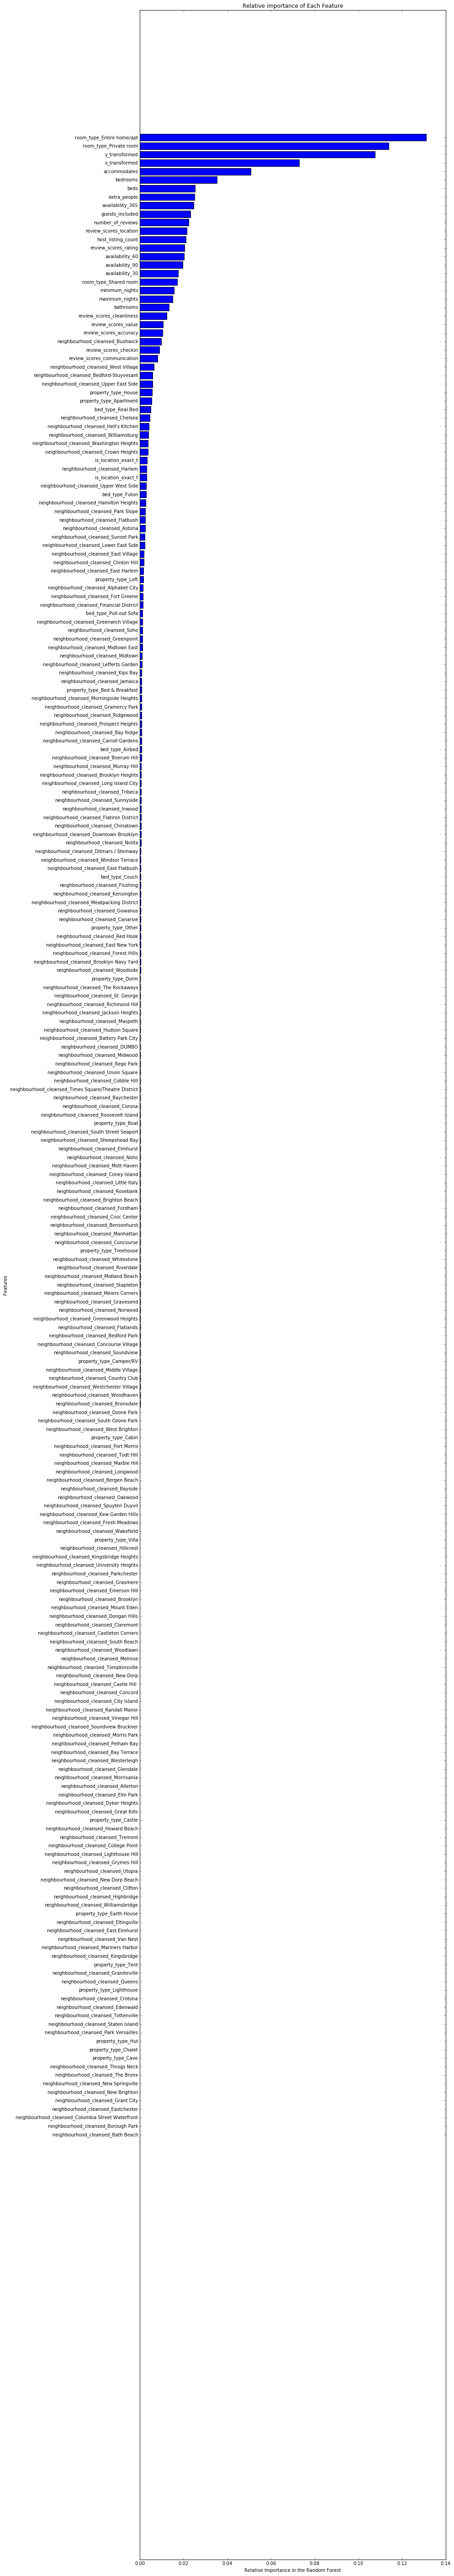

In [154]:
# random forest feature importance for model with census code
importance_list = model.feature_importances_
name_list = x_df.columns
unicode_name_list = [unicode(i, "utf-8") for i in name_list]
importance_list, name_list = zip(*sorted(zip(importance_list, unicode_name_list)))
plt.figure(figsize=(12,100))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

**NOTE**: In listings-model_ways_to_represent_location.ipynb, we explored different three different ways to represent location and tuned RF again. We ended up improving the accuracy by several percentage points and chose RF as our final model. 

## Tune LDA

solver 
‘svd’: Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.
‘lsqr’: Least squares solution, can be combined with shrinkage.
‘eigen’: Eigenvalue decomposition, can be combined with shrinkage.


shrinkage : string or float, optional
None: no shrinkage (default).
‘auto’: automatic shrinkage using the Ledoit-Wolf lemma.
float between 0 and 1: fixed shrinkage parameter.
Note that shrinkage works only with ‘lsqr’ and ‘eigen’ solvers.

In [155]:
#LDA original 
lda = LDA()
lda.fit(x_train, y_train)
lda_scores = score(lda, x_test, y_test)
print lda_scores

overall accuracy       0.509477
accuracy on class 1    0.684345
accuracy on class 2    0.441120
accuracy on class 3    0.486361
accuracy on class 4    0.379755
accuracy on class 5    0.564837
dtype: float64


In [156]:
# change solver and add shrinkage
lda = LDA(shrinkage = 'auto', solver = 'eigen')
lda.fit(x_train, y_train)
lda_scores = score(lda, x_test, y_test)
print lda_scores

overall accuracy       0.315446
accuracy on class 1    0.493291
accuracy on class 2    0.000000
accuracy on class 3    0.843026
accuracy on class 4    0.000000
accuracy on class 5    0.042164
dtype: float64


In [157]:
# change solver and add shrinkage
lda = LDA(shrinkage = 'auto', solver = 'lsqr')
lda.fit(x_train, y_train)
lda_scores = score(lda, x_test, y_test)
print lda_scores

overall accuracy       0.397285
accuracy on class 1    0.795527
accuracy on class 2    0.113304
accuracy on class 3    0.189913
accuracy on class 4    0.504076
accuracy on class 5    0.451870
dtype: float64


## Bagging

In [158]:
from sklearn.ensemble import BaggingClassifier

depths = np.arange(9, 14) 
samples = np.arange(0.2, 1, 0.2)
features = np.arange(0.2, 1, 0.2) 
print samples

# To keep track of the best model
best_score = 0

# Run grid search for model with 5-fold cross validation
print '5-fold cross validation:'    
    
# tune max_depth, max_samples, and max_features
for depth in depths:
    for sample in samples:
        for feature in features:
        
            # Cross validation for every experiment
            k_folds = KFold(x_train.shape[0], n_folds=5, shuffle=True)
            scores = []
            
            for train_indices, validation_indices in k_folds:
                # Generate training data
                x_train_cv = x_train[train_indices]
                y_train_cv = y_train[train_indices]
                # Generate validation data
                x_validate = x_train[validation_indices]
                y_validate = y_train[validation_indices]

                # Fit random forest on training data
                model = BaggingClassifier(DecisionTree(max_depth = depth), max_samples=sample, max_features=feature)
                model.fit(x_train_cv, y_train_cv)
                # Score on validation data
                scores += [model.score(x_validate, y_validate)]

            # Record and report accuracy
            average_score = np.mean(scores)
            print "Depth:", depth, "max_samples:", sample, "max_features", feature, "Score:", average_score

            # Update our record of the best parameters see so far
            if average_score > best_score:
                best_score = average_score
                best_sample = sample
                best_feature = feature 
                best_depth = depth
                
# Fit chosen model on entire train set 
model = BaggingClassifier(DecisionTree(max_depth = best_depth), max_samples = best_sample, max_features=best_feature)
model.fit(x_train_cv, y_train_cv)
print 'Chosen depth:', best_depth,'chosen max_sample', best_sample, 'chosen max_features', best_feature
print 'Test accuracy:', best_score 

[ 0.2  0.4  0.6  0.8]
5-fold cross validation:
Depth: 9 max_samples: 0.2 max_features 0.2 Score: 0.433465274666
Depth: 9 max_samples: 0.2 max_features 0.4 Score: 0.476778872794
Depth: 9 max_samples: 0.2 max_features 0.6 Score: 0.497309683428
Depth: 9 max_samples: 0.2 max_features 0.8 Score: 0.49566291518
Depth: 9 max_samples: 0.4 max_features 0.2 Score: 0.448452500367
Depth: 9 max_samples: 0.4 max_features 0.4 Score: 0.491545655578
Depth: 9 max_samples: 0.4 max_features 0.6 Score: 0.507137170876
Depth: 9 max_samples: 0.4 max_features 0.8 Score: 0.504665986496
Depth: 9 max_samples: 0.6 max_features 0.2 Score: 0.441370515549
Depth: 9 max_samples: 0.6 max_features 0.4 Score: 0.489405256099
Depth: 9 max_samples: 0.6 max_features 0.6 Score: 0.50230579193
Depth: 9 max_samples: 0.6 max_features 0.8 Score: 0.511363943843
Depth: 9 max_samples: 0.8 max_features 0.2 Score: 0.449274762088
Depth: 9 max_samples: 0.8 max_features 0.4 Score: 0.497859736113
Depth: 9 max_samples: 0.8 max_features 0.6 Sc